# Titanic architectural photos

![Example Image](./tita.jpg)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv('C:/Users/Moussa/Desktop/Titanic/Titanic/train.csv')

In [5]:
df.sample(6, random_state=42)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S


In [6]:
df.groupby('Sex').Survived.mean().to_frame()

,Survived
Sex,
female,0.742038
male,0.188908


In [7]:
df.groupby('Pclass').Survived.mean().to_frame()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Survived', ylabel='Age'>

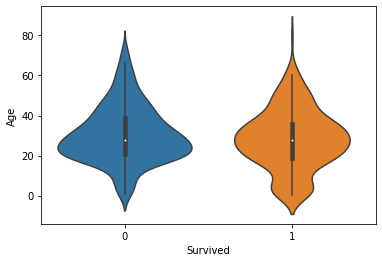

In [8]:
sns.violinplot(x='Survived', y='Age', data=df)

In [9]:
df[df.Parch > 0].Survived.mean()

0.5117370892018779

In [10]:
df[df.Parch == 0].Survived.mean()


0.34365781710914456

In [11]:
df[df.SibSp > 0].Survived.mean()

0.4664310954063604

In [12]:
df[df.SibSp == 0].Survived.mean()

0.34539473684210525

In [15]:
df.groupby('Embarked').Survived.mean().to_frame()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [16]:
df['cabinletter'] = df.Cabin.apply(lambda x: x[0] if not pd.isna(x) else x)
df.groupby('cabinletter').Survived.agg(['count', 'mean'])

,count,mean
cabinletter,,
A,15,0.466667
B,47,0.744681
C,59,0.593220
D,33,0.757576
E,32,0.750000
F,13,0.615385
G,4,0.500000
T,1,0.000000


In [21]:
(df.Name.value_counts()==1).sum()

891

In [23]:
len(df)

891

In [36]:
df["lastname"]=df.Name.apply(lambda x: x.split(',')[0])
t_df=df.groupby('lastname').Survived.agg(['count','mean']).sort_values('count',ascending=False)
t_df[(t_df['count']>1) & (t_df['count']<10)]

,count,mean
lastname,,
Andersson,9,0.222222
Sage,7,0.000000
Skoog,6,0.000000
Carter,6,0.666667
Goodwin,6,0.000000
...,...,...
Zabour,2,0.000000
White,2,0.000000
McCoy,2,1.000000


In [41]:
f_df=df.groupby('Ticket').Survived.agg(['count','mean']).sort_values('count',ascending=False)
f_df

,count,mean
Ticket,,
1601,7,0.714286
CA. 2343,7,0.000000
347082,7,0.000000
CA 2144,6,0.000000
347088,6,0.000000
...,...,...
345572,1,1.000000
345364,1,0.000000
343276,1,0.000000
